In [ ]:
from notebooks import *
memory.log.level = 'debug'
sg.init(app=None)

PRINT    [19:28:44.853] [11385] 120 api.server_globals/_sg_load: 2

PRINT    [19:28:44.898] [11385] 133 api.server_globals/_sg_load: 3

PRINT    [19:28:44.942] [11385] 134 api.server_globals/_sg_load: 4

INFO     [19:28:45.379] [11385]  52 logging_/init_logging: {logging_yaml: None}

INFO     [19:28:45.488] [11385]  31 api.server_globals/init

•

 api/server_globals/load_search(version=2)


•

 api/server_globals/load_xc_meta(version=3)


PRINT    [19:28:46.124] [11385]  79 api.server_globals/load

!

 api/server_globals/load_d_feats(version=4)


PRINT    [19:28:46.135] [11385] 124 api.server_globals/load_d_feats

INFO     [19:28:46.136] [11385] 126 api.server_globals/load_d_feats

PRINT    [19:28:46.147] [11385]  81 api.server_globals/load

•

 api/server_globals/load_search_recs(version=8)


PRINT    [19:29:02.991] [11385]  83 api.server_globals/load

INFO     [19:29:02.993] [11385]  33 api.server_globals/init: done

In [ ]:

def opt(*args, **kwargs):
    verbose_keys = ['cache', 'audio']
    verbose(*args, **{k: v for k, v in kwargs.items() if k in verbose_keys})
    par(**{k: v for k, v in kwargs.items() if k not in verbose_keys})

def par(**kwargs):
    """
    Usage:
        par(use=None)                         # No par, no progress bars (easier to see audio read/write and cache hit/miss)
        par(use='sync')                       # No par, cooperative progress bars (no lines printing over each other)
        par(use='dask', scheduler='threads')  # Par, uncooperative progress bars (lines print over each other)
    """
    progress_kwargs(override=kwargs)

def verbose(
    both=None,       # Shorthand, e.g. verbose('warn') = verbose(cache='warn', audio='warn')
    *,
    cache='debug',   # Show cache hit/miss lines # WARNING Frequent hangs during bigger xc_similar_html calls...
    # cache='info',  # Show cache hit/miss chars # WARNING (same)
    # cache='warn',  # Quiet
    audio='debug',   # Show read/write
    # audio='info',  # Show write
    # audio='warn',  # Quiet
):
    if both:
        cache = both
        audio = both
    memory.log.level = cache
    log_levels({'load': audio.upper()})

def n_recs_by_sp_quality(df):
    return (df
        # Count recs by (species, quality)
        .pipe(df_remove_unused_categories)
        .assign(n=1).groupby(['species', 'quality']).n.sum().reset_index()
        # Strip and restore .species cat around .pivot_table to workaround category error when adding .total
        .pipe(df_cat_to_str)
        # Pivot
        .pivot_table(index='species', columns='quality', values='n', fill_value=0, aggfunc='sum',
            margins=True, margins_name='total',  # FIXME 'total' ends up as NaN because we cat .species
        )
        # Restore .species cat
        .reset_index().astype({'species': metadata.species.df.shorthand.dtype}).sort_values('species').set_index('species')
        # Drop columns.name from .pivot_table ('quality')
        .T.pipe(df_set_index_name, None).T
        # Add .total
        # .pipe(df_assign_first, total=lambda df: df.sum(axis=1))
        .pipe(df_reorder_cols, first=['total'])
        # Sort
        .sort_values('total', ascending=False)
    )

to_paths_sliced: [

] |   0% (1) |  0.0s

to_paths_sliced: [

#################################################################################

] | 100% (1) |  0.1s

f_f: [

] |   0% (1) |  0.0s

f_f: [

#############################################################################################

] | 100% (1) |  0.1s

f_p: [

] |   0% (1) |  0.0s

f_p: [

] |   0% (1) |  0.1s

f_p: [

] |   0% (1) |  0.2s

f_p: [

#############################################################################################

] | 100% (1) |  0.3s

d_f2: [

] |   0% (27033) |  0.0s

d_f2: [

########################################################################################

] | 100% (27033) |  2.0s

d_fc: [

] |   0% (27033) |  0.0s

d_fc: [

] |   0% (27033) |  0.9s

d_fc: [

] |   0% (27033) |  1.0s

d_fc: [

] |   0% (27033) |  1.2s

d_fc: [

] |   0% (27033) |  1.3s

d_fc: [

] |   0% (27033) |  1.4s

d_fc: [

] |   0% (27033) |  1.5s

d_fc: [

########################################################################################

] | 100% (27033) |  1.6s

d_p2: [

] |   0% (27033) |  0.0s

d_p2: [

########################################################################################

] | 100% (27033) |  0.6s

d_pc: [

] |   0% (27033) |  0.0s

d_pc: [

] |   0% (27033) |  0.3s

d_pc: [

########################################################################################

] | 100% (27033) |  0.4s

audio: [

] |   0% (10) |  0.0s

audio: [

] |   0% (10) |  0.1s

audio: [

##########################################################################################

] | 100% (10) |  0.3s

spectro: [

] |   0% (10) |  0.0s

spectro: [

########################################################################################

] | 100% (10) |  0.1s

plot_slice: [

] |   0% (10) |  0.0s

plot_slice: [

#########################                                                            

] |  30% (10) |  0.1s

plot_slice: [

#####################################################################################

] | 100% (10) |  0.2s

,xc_id,d_slp,d_f2,d_p2,d_fc,d_pc,species,slice,quality,type,subspecies,background_species,recordist,elevation,place,remarks,bird_seen,playback_used,recs_for_sp
0,381417,0.0,0.0,0.0,0.0,0.0,YHBL,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",A,song,,[],Sue Riffe,2000 m,"Carpenter Ranch, Routt County, Colorado, United States",Natural vocalization from cattails around a small pond.,yes,no,81
1,76787,3.7,28.8,0.0808,0.111,0.326,WTKI,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",B,call,majusculus,['OCWA'],Stuart Fisher,350 m,"Angels Creek Trail, Lake Melones, Calaveras, United States","Bird not seen whilst recording but a bird was later seen in display flight, however Ospreys were also present with a very similar call",None,None,18
2,279000,3.61,26.6,0.0829,0.0928,0.338,DCFL,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",B,song,,[],Nick Komar,1600 m,"Huachuca Canyon - bridge at 0.2 miles, Cochise County, AZ, United States",From tree canopy in riparian zone. Recording amplified and filtered.,yes,no,130
3,351645,3.54,31.1,0.0878,0.12,0.341,GWTE,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",B,call,,[],Janine McCabe,750 m,"Tucson, Pima County, Arizona, United States",Green-winged Teal male were displaying for females on a pond at about 20 meters distance away. This is a park setting in Tucson with large mesquite trees surrounding the pond. The recording was n...,None,None,45
4,352213,3.61,25.7,0.0843,0.0979,0.342,DCFL,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",B,song,querulus?,[],Frank Lambert,2200 m,"Reserva de la Chara Pinta (Tufted Jay Preserve), Sinaloa, Mexico",,None,no,130
5,414555,4.55,29.2,0.0847,0.107,0.35,BANO,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",B,call,,[],Andy Wilson,120 m,"1113 Wilcox Ct, Frederick, MD, United States",,no,no,32
6,11835,5.54,35.4,0.0887,0.128,0.351,RWBL,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",B,Song,,"['HOSP', 'Downy Woodpecker drumming']",Allen T. Chartier,175 m,"Michigan, Pte. Mouillee SGA, United States",,None,None,497
7,72510,3.54,24.9,0.0869,0.0895,0.351,GWTE,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",B,call,,[],Paul Driver,5 m,"Taylor's Refuge, Cinnaminson, NJ, United States","birds not seen, male burps and female chattering",None,None,45
8,265347,3.54,31.8,0.0831,0.156,0.351,GWTE,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",B,call,,['AMCR'],Eric Hough,2500 m,"River Reservoir, Apache-Sitgreaves National Forest, Greer, Apache County, Arizona, United States",Large flock calling. Amplification and high pass filter used.,yes,no,45
9,373515,4.5,28.3,0.0864,0.121,0.356,CLNU,"<!-- Wrap in case x contains an audio elem, which would fool our selector below -->",B,"begging call, call, juvenile",,[],Bobby Wilcox,2800 m,"Nevada (near Baker), White Pine County, Nevada, United States",About 40ft away in pine forest. Higher pitched calls are from an adult-sized juvenile bird getting fed by one of its parents who calls a few time about 2/3 through the recording. Amplified and h...,yes,no,81

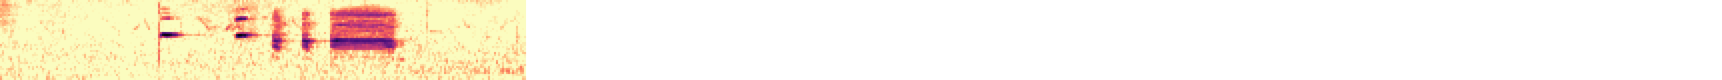
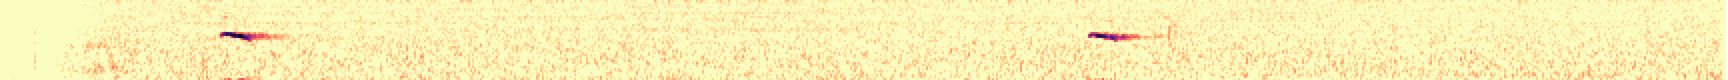
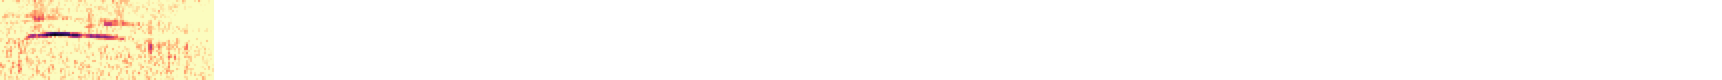
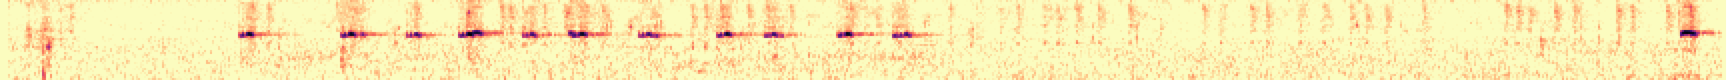
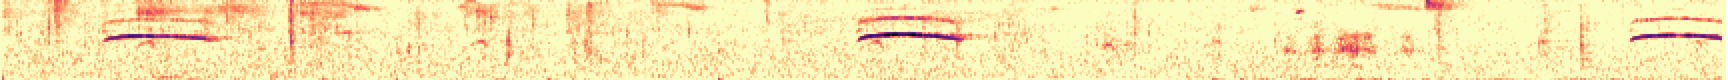
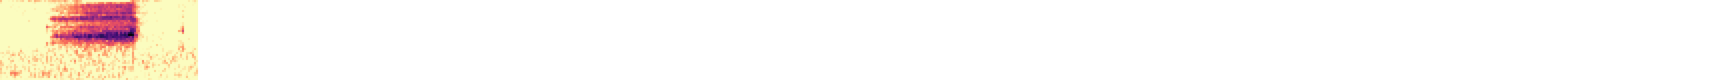
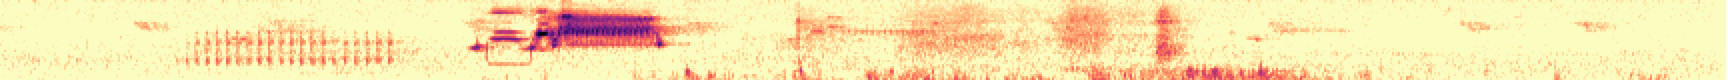
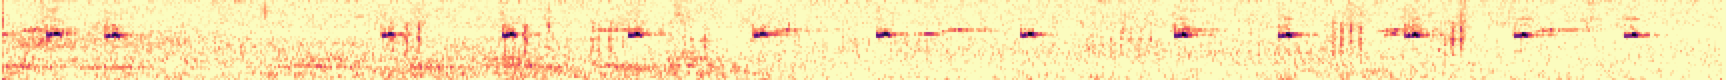
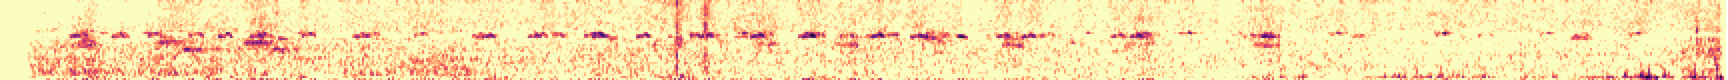
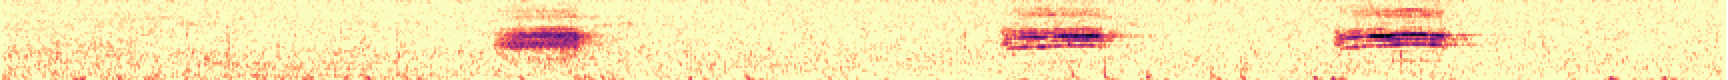

peak memory: 4805.95 MiB, increment: 937.36 MiB

In [ ]:
%%memit -c
# Optimize perf
#   - NOTE n_sp=None -> 27035/35233 recs because quality='ab'
opt('warn', use='dask', scheduler='threads')  # Quiet + par + progress bars
# opt('warn', use='sync')
# opt('debug', use='sync')  # Verbose + sync + no progress bars
with ExitStack() as stack:
    stack.enter_context(cache_control(
        # tags_fail_on_miss=['rec'],  # Require warmed cache for 'rec' funcs
        # tags_refresh=['recs'],  # Measure un-warmed cache for 'recs' funcs
        # tags_refresh=['sp14/model/species_proba'],  # XXX Dev
    ))
    display(
        xc_similar_html(
            sp_cols='species',

            # Perf: search_recs
            #   (countries_k='na', com_names_k='ca'): total[TODO] = meta[112s] feat[70s] f_p[91s]

            # Perf bottlenecks
            #   - meta: O(n) cache hits
            #   - feat: O(n) cache hits
            #   - p:    O(n) sg.search.predict_proba [@cache would achieve perf ~between meta and feat, which is only ~2x speedup]
            # xc_id=381417, n_total=10,   n_sp=1,     # t[4.0s] n_recs[   32,0]
            # xc_id=381417, n_total=10,   n_sp=2,     # t[    ] n_recs[       ]
            # xc_id=381417, n_total=10,   n_sp=10,    # t[7.1s] n_recs[  717,0]
            # xc_id=381417, n_total=10,   n_sp=40,    # t[ 25s] n_recs[ 3879,1]
            # xc_id=381417, n_total=10,   n_sp=80,    # t[ 51s] n_recs[ 8203,1]
            # xc_id=381417, n_total=10,   n_sp=160,   # t[111s] n_recs[15284,1]
            xc_id=381417, n_total=10,   n_sp=None,  # t[192s] n_recs[27033,2]

            # xc_id=414126, n_total=10,   n_sp=20,     # XXX Dev

            view=False,  # For .pipe(n_recs_by_sp_quality): disable html view else junk .species values
        )
        # .pipe(n_recs_by_sp_quality)
    )

In [ ]:
# Use /species
xc_species_html(species='WTSP', n_recs=3)

In [ ]:
# Use /similar
opt('warn', use='dask', scheduler='threads')  # Quiet + par + progress bars
xc_similar_html(
    # view=False,
    # n_total=20,
    # n_sp_recs=1,

    # Examples (bad/good)
    # xc_id=381417,  # YHBL (bad)
    xc_id=173272,  # LOSH (bad)
    # xc_id=15222,   # JUTI (bad)
    # xc_id=408021,  # WREN (good)
    # xc_id=348142,  # PSFL (good)
    # xc_id=378376,  # WCSP (good)
    # xc_id=381582,  # COYE (good)
    # xc_id=416558,  # COYE (good)
    # xc_id=329879,  # WTSP (good)

    n_sp=3,
    # n_sp=10,
    # n_sp=20,
    # n_sp=40,
    # n_sp=80,
    # n_sp=160,
    # n_sp=None,

)